# Primera aproximación al modelo de Watts-Strogatz

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Red Anillo regular

def Anillo(N, l = 2):
    nodos = np.arange(N)
    G = nx.Graph()
    G.add_nodes_from( nodos )
    
    for i in range(l):
        G.add_edges_from( zip( nodos, np.roll(nodos, i+1) ) )
    return G


el coeficiente de clustering de la red es :  1.0


1

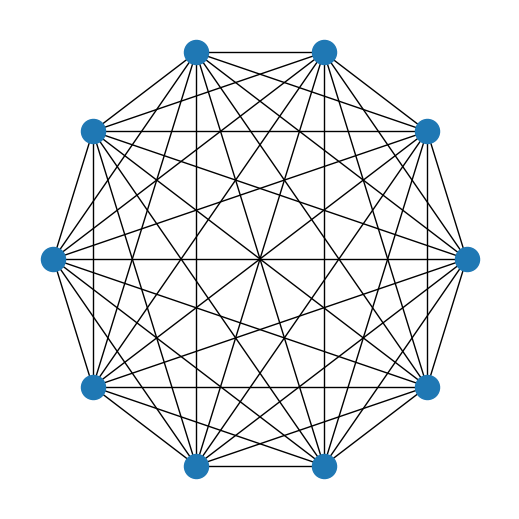

In [10]:

# juega con ambos parámetros para ver la estructura y el coeficiente de clustering
G = Anillo(10, 9) #
print('el coeficiente de clustering de la red es : ', nx.clustering(G)[0])
plt.figure(figsize = [5,5])
nx.draw_circular(G)

nx.diameter(G)


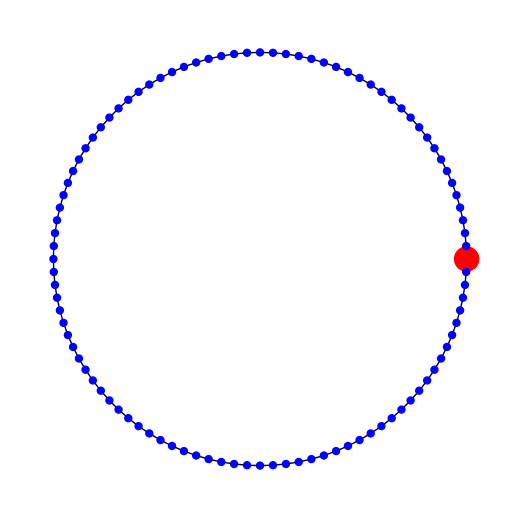

Clustering =  0.0
Diametro =  50


In [17]:

G = Anillo(100,1)

N = len(G)
tamanos = [300]
tamanos = tamanos + (N-1)*[25]
colores = ['red']
colores = colores + (N-1)*['blue']

plt.figure(figsize = [5,5])
nx.draw_circular(G, node_size = tamanos, node_color = colores)
plt.show()

print('Clustering = ', nx.average_clustering(G) ) 
print('Diametro = ', nx.diameter(G) ) 


In [19]:
# Matriz de distancias y distancias caracteristicas

MatD0 = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        MatD0[i,j] = nx.shortest_path_length(G, i, j)
dmin = np.min(MatD0)
dmax = np.max(MatD0)

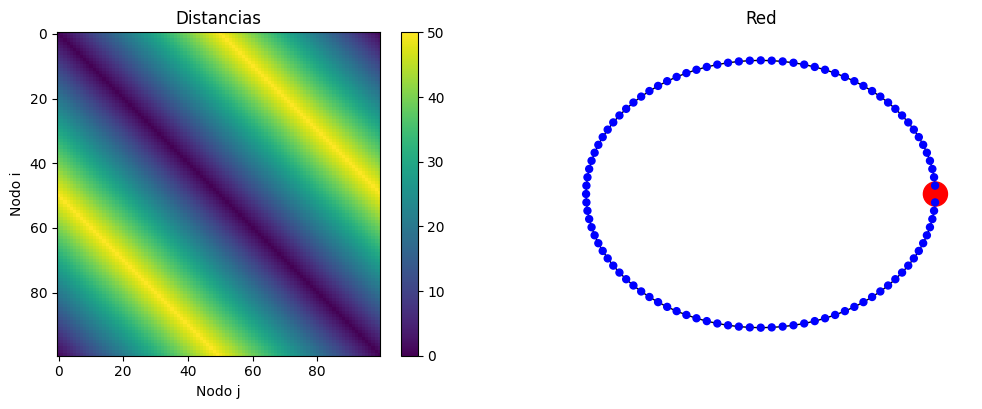

Distancia máxima entre nodos (diámetro): 	 50.0
Distancia promedio entre nodos: 		 25.0
Coeficiente de clustering promedio de la red: 	 0.0


In [20]:
h = .6 #parametro para jugar con el tamaño de la imagen
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G, node_size = tamanos, node_color = colores, ax = ax2)
pos = ax1.imshow(MatD0, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)

ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')
plt.show()

print('Distancia máxima entre nodos (diámetro): \t', np.max(MatD0))
print('Distancia promedio entre nodos: \t\t', np.mean(MatD0))
print('Coeficiente de clustering promedio de la red: \t', nx.average_clustering(G))

In [21]:
def cambio_enlace(G):
  # ojo con el uso de los conjutos (set)
  nodo1 = np.random.choice(G)
  nodo2 = np.random.choice( G[nodo1] )
  G.remove_edge(nodo1, nodo2)
  seleccion = set(G) - set(G[nodo1]) - set([nodo1])
  
  nuevo_nodo = np.random.choice( list(seleccion) )
  
  G.add_edge(nodo1, nuevo_nodo)

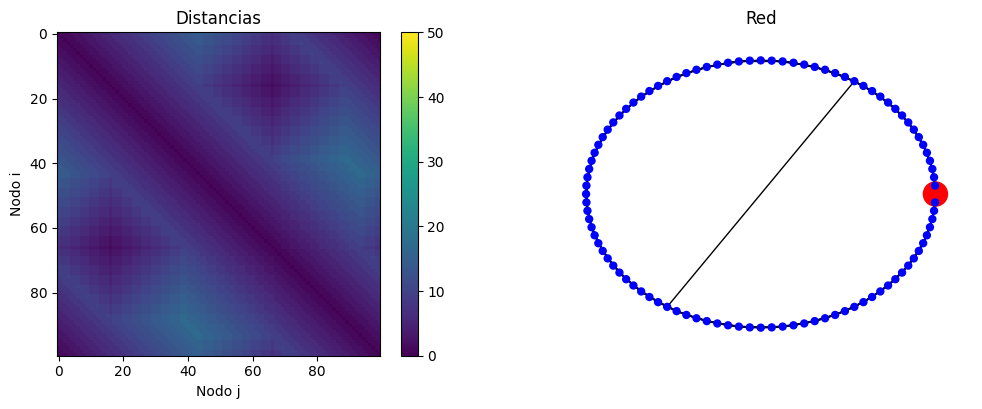

Diametro: 		 50.0 --> 17.0
Distancia media: 	 25.0 --> 7.1096
Clustering: 		 0.600000000000001 --> 0.5966190476190486


In [31]:
# Generar redes
N = 100
l = 3

G = Anillo(N, l)

G2 = G.copy()

# Modificación de la red

cambio_enlace(G2)

MatD = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        MatD[i,j] = nx.shortest_path_length(G2, i, j)

h = .6

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G2, node_size = tamanos, node_color = colores, ax = ax2)


#fig, ax = plt.subplots(figsize = (10*h,7*h)) 
pos = ax1.imshow(MatD, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)
ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')

plt.show()
print('Diametro: \t\t', np.max(MatD0), '-->',np.max(MatD))
print('Distancia media: \t', np.mean(MatD0), '-->', np.mean(MatD))
print('Clustering: \t\t', nx.average_clustering(G), '-->', nx.average_clustering(G2))

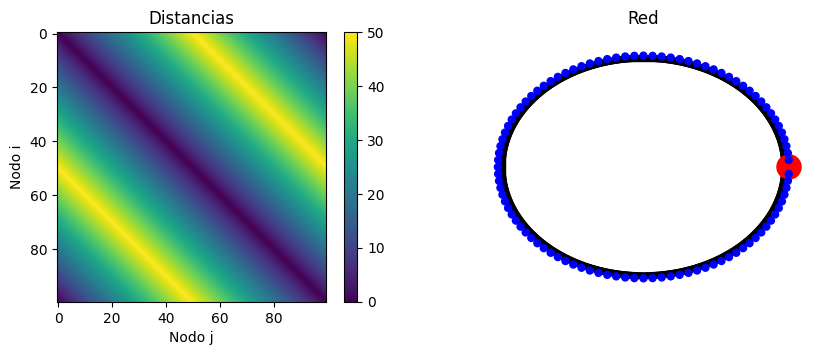

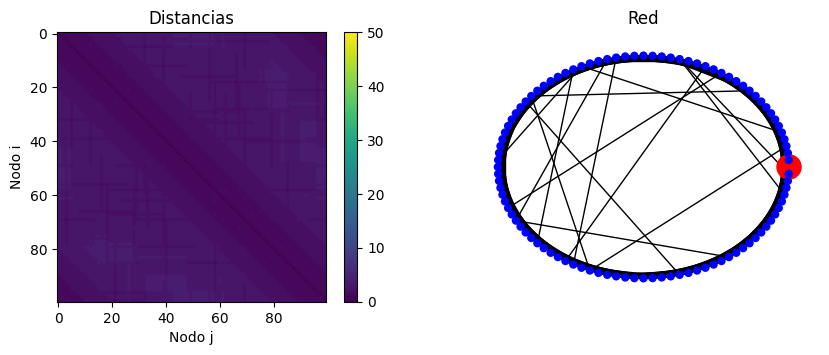

Diametro:  50.0 --> 4.0
Distancia media:  25.0 --> 2.3444
Clustering:  0.7105263157894736 --> 0.6855030445990193


In [53]:
G2 = G.copy()

veces = 15

for k in range(veces):
    cambio_enlace(G2)


MatD = np.zeros([N,N])

for i in range(N):
    for j in range(N):
        MatD[i,j] = nx.shortest_path_length(G2, i, j)

h = .5

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G, node_size = tamanos, node_color = colores, ax = ax2)


#fig, ax = plt.subplots(figsize = (10*h,7*h)) 
pos = ax1.imshow(MatD0, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)

ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')
plt.show()


fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G2, node_size = tamanos, node_color = colores, ax = ax2)


#fig, ax = plt.subplots(figsize = (10*h,7*h)) 
pos = ax1.imshow(MatD, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)
ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')

plt.show()
print('Diametro: ', np.max(MatD0), '-->',np.max(MatD))
print('Distancia media: ', np.mean(MatD0), '-->', np.mean(MatD))
print('Clustering: ', nx.average_clustering(G), '-->', nx.average_clustering(G2))

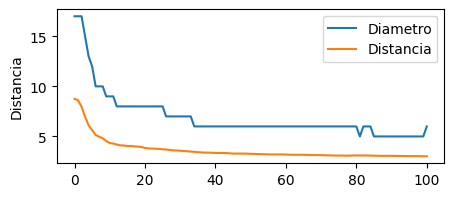

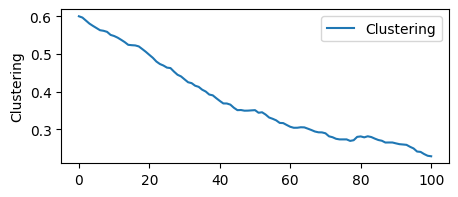

In [58]:
#Genera la red anillo
#### INICIO EJERCICIO

N = 100
l = 3

G = Anillo(N,l)

G2 = G.copy()
#### FINAL  EJERCICIO      
# Generar una lista para cada variable. El primer elemento de cada lista es el valor inicial del diámetro
# la distancia promedio y el coeficiente de clustering promedio de la red.

Diam = [nx.diameter(G2)]
Dist = [nx.average_shortest_path_length(G2)]
Clus = [nx.average_clustering(G2)]

# Aplica la fucnión cambio_enlace varias veces (define cuantas veces), y cada vez que lo apliques, calcula los nuevos valores 
# y agrégalos a la lista usando lista.append(valor). Para ello haz un bucle usando k

k =  100

for i in range(k):
    ### INICIO EJERCICIO
    cambio_enlace(G2)
    
    # agrega los valores a las correspondientes listas
    Diam.append(nx.diameter(G2))
    Dist.append(nx.average_shortest_path_length(G2))
    Clus.append(nx.average_clustering(G2))
    ### FINAL EJERCICIO
    

    # Las siguientes líneas hacen una gráfica simple de las listas de valores generados. 
# El diámetro y la distancia promedio se grafican juntas, el clustering aparte.
plt.figure(figsize=(5,2))
plt.plot(Diam)
plt.plot(Dist)
plt.legend(['Diametro', 'Distancia'])
plt.ylabel('Distancia')
plt.show()

plt.figure(figsize=(5,2))
plt.plot(Clus)
plt.legend(['Clustering'])
plt.ylabel('Clustering')
plt.show()

In [59]:
import tqdm

In [67]:
# Se generan las listas donde se introducirán las listas de los valores de cada corrida.
N = 100
l = 3

G = Anillo(N,l)


DIAM = []
DIST = []
CLUS = []

corridas = 15

for l in range(corridas):
  #### INICIO EJERCICIO Haz lo mismo que hiciste en la casilla anterior, pero ahora dentro de este bucle para que se haga varias veces
  G2 = G.copy()

  #crea las listas de cada variable aplicada a G2
  Diam = [nx.diameter(G2)]
  Dist = [nx.average_shortest_path_length(G2)]
  Clus = [nx.average_clustering(G2)]

  k = 100 # numero de cambio de enlaces

  for i in range(k):
    #aplica la función cambio de enlace y agrega las nuevas propiedades de la red a las lista
    cambio_enlace(G2)
    Diam.append(nx.diameter(G2))
    Dist.append(nx.average_shortest_path_length(G2))
    Clus.append(nx.average_clustering(G2))
    
  #### FINAL EJERCICIO
  #las siguientes lineas agregan la información de cada corrida a una lista
  DIAM.append(Diam)
  DIST.append(Dist)
  CLUS.append(Clus)

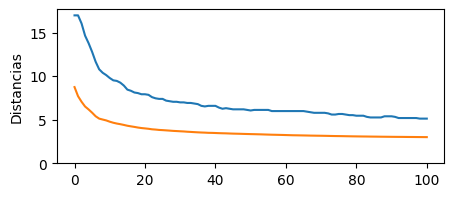

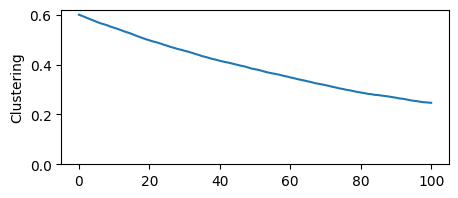

In [68]:
Y1 = np.mean(np.array(DIAM), axis = 0)
Y2 = np.mean(np.array(DIST), axis = 0)
Y3 = np.mean(np.array(CLUS), axis = 0)

plt.figure(figsize=(5,2))
plt.plot(Y1)
plt.plot(Y2)
plt.ylim([0,None])
plt.ylabel('Distancias')
plt.show()

plt.figure(figsize=(5,2))
plt.plot(Y3)
plt.ylim([0,None])
plt.ylabel('Clustering')
plt.show()

**De nuevo. ¿Qué puedes decir respecto al comportamiento de las distancias y el clustering? ¿Cómo decaen? ¿Cuál decae más rápido?**

Las distancias siguen decayendo más rápido  mientras que el clustering es un poco  más lento.

# El experimento de Watts-Strogatz

In [69]:
def re_enlazar(G, p):
  nodos = set(G)
  
  for enlace in G.edges():
    if np.random.rand() < p:
      u, v = enlace
      eleccion = nodos -{u} - set(G[u])
      nuevo_v = np.random.choice( list(eleccion) )
      G.remove_edge(u,v)
      G.add_edge(u, nuevo_v)

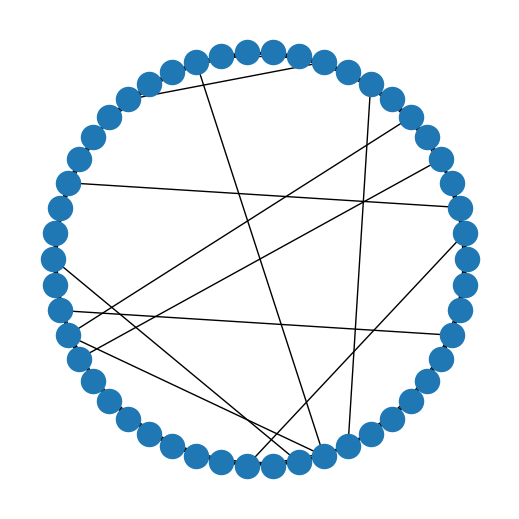

In [70]:
N = 50
l = 3

G = Anillo(N, l)

re_enlazar(G, .1)

plt.figure(figsize = [5,5])
nx.draw_circular(G)

In [71]:
set(G[1]) # Regresa los vecinos de nuestro nodo 1

{0, 2, 3, 4, 37, 48, 49}

Existe una función de Numpy que es linspace para dividir intervalos y demás pero la siguiente función es diferente.


In [72]:
# Puntos equidistantes en una escala logarítimica
np.logspace(0,2,4)

array([  1.        ,   4.64158883,  21.5443469 , 100.        ])

In [156]:
dominio = np.logspace(-4,0,14)
N = 1000
l = 3
corridas = 10

G = Anillo(N,l)
D0 = nx.average_shortest_path_length(G)
C0 = nx.average_clustering(G)

# Ha D y C los vamos a rellenar con los valores promedio de cada corrida
D = []
C = []

for p in dominio:
    Dist = []
    Clus = []
    # for k in range(corridas):
    while len(Dist) < corridas:
        G2 = G.copy()
        re_enlazar(G2, p)
        if not nx.is_connected(G2): continue
        Dist.append(nx.average_shortest_path_length(G2))
        Clus.append(nx.average_clustering(G2))
    D.append(np.mean(Dist)/D0)
    C.append(np.mean(Clus)/C0)


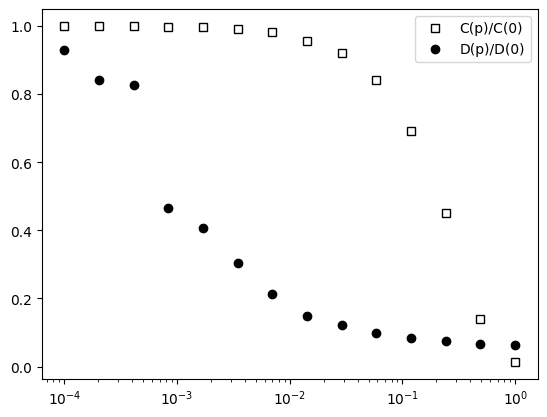

In [157]:
plt.plot(dominio, C, 'ws' , markeredgecolor = 'k', label= 'C(p)/C(0)')
plt.plot(dominio, D, 'ko', label= 'D(p)/D(0)')
plt.legend()
plt.xscale('log')
plt.show()

# Profe aproximación

In [172]:
dominio = np.logspace(-4,0,14)
N = 100
l = 3
corridas = 10

G = Anillo(N,l)
D0 = nx.average_shortest_path_length(G)
C0 = nx.average_clustering(G)

# Ha D y C los vamos a rellenar con los valores promedio de cada corrida
D = []
C = []

for p in dominio:
    Dist = []
    Clus = []
    # for k in range(corridas):
    while len(Dist) < corridas:
        G2 = G.copy()
        re_enlazar(G2, p)
        if not nx.is_connected(G2): continue
        Dist.append(nx.average_shortest_path_length(G2))
        Clus.append(nx.average_clustering(G2))
    D.append(np.array(Dist)/D0)
    C.append(np.array(Clus)/C0)

In [174]:
D

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.83573241, 1.        , 1.        , 1.        , 1.        ]),
 array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 0.9916955, 1.       , 1.       ]),
 array([0.82221453, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99688581, 1.        , 1.        ]),
 array([1.        , 0.81072664, 1.        , 1.        , 1.        ,
        0.9688812 , 1.        , 0.92848904, 1.        , 0.84565167]),
 array([0.71139562, 0.71254902, 0.80975779, 0.82454441, 0.8127797 ,
        1.        , 0.68502884, 1.        , 0.90124567, 1.        ]),
 array([0.74357555, 0.76152249, 0.72745098, 0.82747405, 0.81478662,
        0.67188005, 0.76745098, 0.74756632, 0.81921569, 0.74316032]),
 array([0.78459054, 0.6927797 , 0.65990773, 1.        , 0.52163783,
        0.79822376, 0.65144175, 0.64782007, 0.79130334, 0.662329

In [175]:
C

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.99436508, 1.        , 1.        , 1.        , 1.        ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99738095, 1.        , 1.        ]),
 array([0.9865873 , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99261905, 1.        , 1.        ]),
 array([1.        , 0.98095238, 1.        , 1.        , 1.        ,
        0.99047619, 1.        , 0.9865873 , 1.        , 0.9865873 ]),
 array([0.98436508, 0.97142857, 0.97706349, 0.9865873 , 0.98095238,
        1.        , 0.96365079, 1.        , 0.98484127, 1.        ]),
 array([0.97531746, 0.97920635, 0.98095238, 0.99436508, 0.99047619,
        0.97      , 0.96285714, 0.98873016, 0.98484127, 0.97992063]),
 array([0.98484127, 0.95404762, 0.95246032, 1.        , 0.91880952,
        0.98484127, 0.97428571, 0.97142857, 0.97142857

In [176]:
print(np.array(D).shape, np.array(C).shape)

(14, 10) (14, 10)


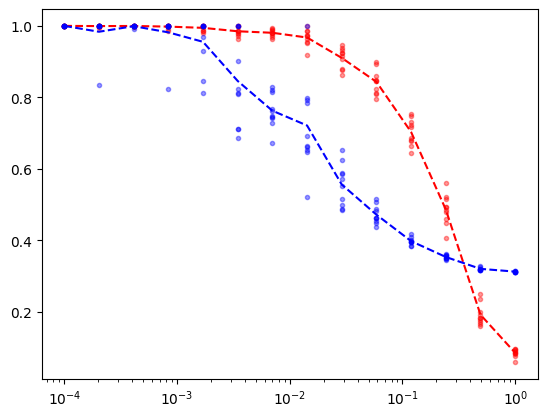

In [178]:
plt.plot(dominio,np.array(C),'r.',alpha=.4)
plt.plot(dominio,np.mean(np.array(C), axis = 1),'r--',alpha = 1)

plt.plot(dominio,np.array(D),'b.',alpha=.4)
plt.plot(dominio,np.mean(np.array(D),axis = 1),'b--',alpha = 1)

plt.xscale('log')

# Mi aproximación

In [186]:
import seaborn as sns
import pandas as pd

In [397]:
dominio = np.logspace(-4,0,14)
N = 1000
l = 5
corridas = 15

G = Anillo(N,l)
D0 = nx.average_shortest_path_length(G)
C0 = nx.average_clustering(G)

# Ha D y C los vamos a rellenar con los valores promedio de cada corrida
D = []
C = []

for p in dominio:
    Dist = []
    Clus = []
    # for k in range(corridas):
    while len(Dist) < corridas:
        G2 = G.copy()
        re_enlazar(G2, p)
        if not nx.is_connected(G2): continue
        Dist.append(nx.average_shortest_path_length(G2))
        Clus.append(nx.average_clustering(G2))
    D.append(np.array(Dist)/D0)
    C.append(np.array(Clus)/C0)

In [398]:
dominio = list(dominio)

In [403]:
D_list = []
for i in range(5):
    D_list.append(list(np.array(D).T[i]))

D_df = pd.DataFrame({"D¨1": D_list[0], "D¨2": D_list[1], "D¨3": D_list[2], "D¨4": D_list[3], "D¨5": D_list[4], "p": dominio},index = dominio)
D_df = D_df.T
D_df

,0.000100,0.000203,0.000412,0.000838,0.001701,0.003455,0.007017,0.014251,0.028943,0.058780,0.119378,0.242446,0.492388,1.000000
D¨1,1.000000,0.810190,0.682137,0.767645,0.385805,0.298000,0.218613,0.166933,0.122493,0.099446,0.084985,0.074316,0.067111,0.064805
D¨2,1.000000,1.000000,0.983945,0.461017,0.401108,0.320916,0.211911,0.152554,0.123423,0.097396,0.083225,0.074490,0.067149,0.064823
D¨3,0.833080,0.968384,0.759607,0.797951,0.429083,0.264845,0.184933,0.154112,0.121894,0.098701,0.086015,0.074219,0.067086,0.064734
D¨4,0.966596,0.829908,0.763558,0.616914,0.361196,0.306632,0.213254,0.145216,0.116378,0.097705,0.084787,0.074241,0.067192,0.064812
D¨5,0.776612,0.816063,0.645829,0.627434,0.557411,0.223986,0.216180,0.157759,0.121224,0.097868,0.084141,0.073546,0.067117,0.064758
p,0.000100,0.000203,0.000412,0.000838,0.001701,0.003455,0.007017,0.014251,0.028943,0.058780,0.119378,0.242446,0.492388,1.000000


In [404]:
C_list = []
for i in range(5):
    C_list.append(list(np.array(C).T[i]))

C_df = pd.DataFrame({'C1':C_list[0], 'C2':C_list[1], 'C3':C_list[2], 'C4':C_list[3], 'C5':C_list[4],'p':dominio}, index = dominio)
C_df = C_df.T
C_df

,0.000100,0.000203,0.000412,0.000838,0.001701,0.003455,0.007017,0.014251,0.028943,0.058780,0.119378,0.242446,0.492388,1.000000
C1,1.00000,0.999053,0.997930,0.999418,0.994051,0.991296,0.983150,0.963765,0.918745,0.835758,0.687896,0.450764,0.138413,0.015320
C2,1.00000,1.000000,0.999635,0.997091,0.995345,0.990845,0.981766,0.956076,0.928095,0.825629,0.671751,0.454634,0.139639,0.013927
C3,0.99931,0.999418,0.998945,0.998836,0.995887,0.987526,0.975933,0.958034,0.919760,0.835072,0.708970,0.445413,0.143431,0.015493
C4,0.99931,0.998728,0.999310,0.998688,0.994213,0.991101,0.982187,0.953794,0.909728,0.825832,0.692089,0.452154,0.147985,0.016022
C5,0.99931,0.999161,0.998836,0.997781,0.997091,0.983095,0.984833,0.961874,0.916102,0.823275,0.682613,0.426685,0.140234,0.013199
p,0.00010,0.000203,0.000412,0.000838,0.001701,0.003455,0.007017,0.014251,0.028943,0.058780,0.119378,0.242446,0.492388,1.000000


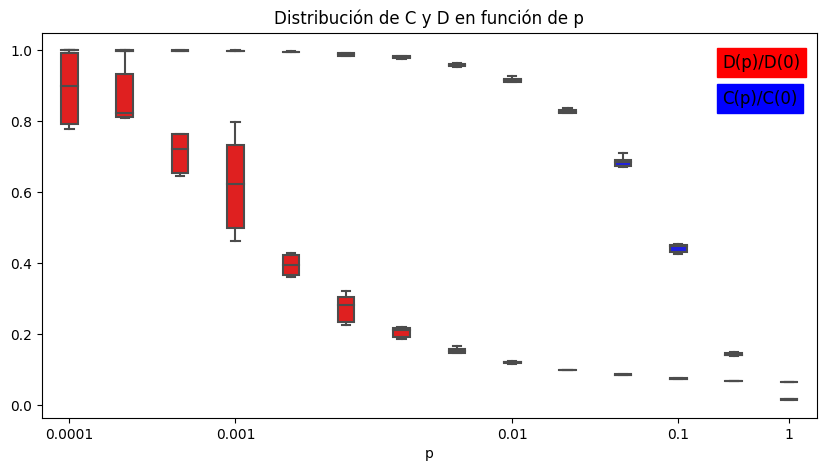

In [468]:
plt.figure(figsize = [10,5])
sns.boxplot(data = D_df,color = 'r', width = 0.3,showfliers = False, labels = 'D')
sns.boxplot(data = C_df, color = 'b', width = 0.3, showfliers = False, labels = 'C')
plt.text(11.8, 0.85, 'C(p)/C(0)', color = 'k', fontsize = 12,backgroundcolor = 'b')
plt.text(11.8, 0.95, 'D(p)/D(0)', color = 'k', fontsize = 12,backgroundcolor = 'r')

plt.title('Distribución de C y D en función de p')
# plt.xticks(rotation = 45, ha = 'right', fontsize = 8)
plt.xticks([0,3,8,11,13],['0.0001','0.001','0.01','0.1','1'])
plt.xlabel('p')

# plt.plot(dominio,np.mean(np.array(D), axis = 1),'r--',alpha = 1)
# plt.plot(dominio,np.mean(np.array(C),axis = 1),'b--',alpha = 1)
# plt.xscale('log')
plt.show()



In [ ]:
dominio = np.logspace(-3,0,10)
N = 1000
l = 3
corridas = 5

G = Anillo(N,l)
D0 = nx.average_shortest_path_length(G)
C0 = nx.average_clustering(G)

# Ha D y C los vamos a rellenar con los valores promedio de cada corrida
D = []
C = []

for p in dominio:
    Dist = []
    Clus = []
    # for k in range(corridas):
    while len(Dist) < 10:
        G2 = G.copy()
        re_enlazar(G2, p)
        if not nx.is_connected(G2): continue
        Dist.append(nx.average_shortest_path_length(G2))
        Clus.append(nx.average_clustering(G2))
    D.append(np.mean(Dist)/D0)
    C.append(np.mean(Clus)/C0)


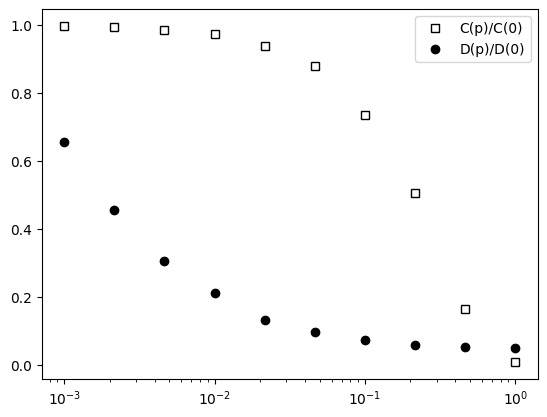

In [ ]:
plt.plot(dominio, C, 'ws' , markeredgecolor = 'k', label= 'C(p)/C(0)')
plt.plot(dominio, D, 'ko', label= 'D(p)/D(0)')
plt.legend()
plt.xscale('log')
plt.show()

In [ ]:
dominio = np.logspace(-4,4,100)
N = 100
l = 3
corridas = 5

G = Anillo(N,l)
D0 = nx.average_shortest_path_length(G)
C0 = nx.average_clustering(G)

# Ha D y C los vamos a rellenar con los valores promedio de cada corrida
D = []
C = []

for p in dominio:
    Dist = []
    Clus = []
    # for k in range(corridas):
    while len(Dist) < 10:
        G2 = G.copy()
        re_enlazar(G2, p)
        if not nx.is_connected(G2): continue
        Dist.append(nx.average_shortest_path_length(G2))
        Clus.append(nx.average_clustering(G2))
    D.append(np.mean(Dist)/D0)
    C.append(np.mean(Clus)/C0)

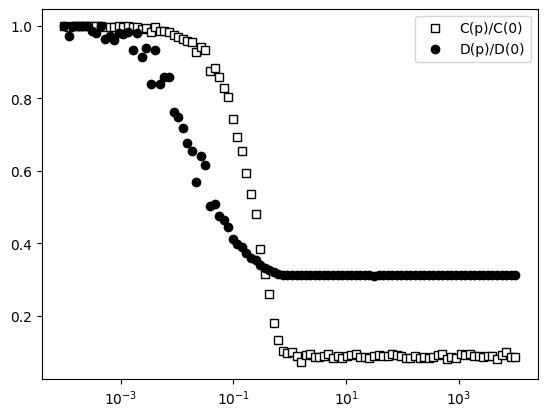

In [ ]:
plt.plot(dominio, C, 'ws' , markeredgecolor = 'k', label= 'C(p)/C(0)')
plt.plot(dominio, D, 'ko', label= 'D(p)/D(0)')
plt.legend()
plt.xscale('log')
plt.show()

In [ ]:
dominio = np.logspace(-4,4,100)
N = 1000
l = 3
corridas = 5

G = Anillo(N,l)
D0 = nx.average_shortest_path_length(G)
C0 = nx.average_clustering(G)

# Ha D y C los vamos a rellenar con los valores promedio de cada corrida
D = []
C = []

for p in dominio:
    Dist = []
    Clus = []
    # for k in range(corridas):
    while len(Dist) < 10:
        G2 = G.copy()
        re_enlazar(G2, p)
        if not nx.is_connected(G2): continue
        Dist.append(nx.average_shortest_path_length(G2))
        Clus.append(nx.average_clustering(G2))
    D.append(np.mean(Dist)/D0)
    C.append(np.mean(Clus)/C0)

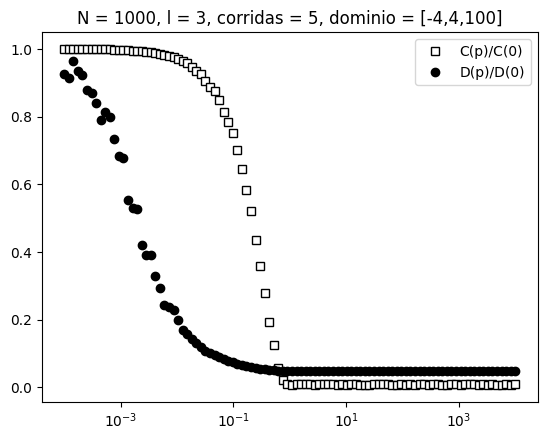

In [ ]:
plt.plot(dominio, C, 'ws' , markeredgecolor = 'k', label= 'C(p)/C(0)')
plt.plot(dominio, D, 'ko', label= 'D(p)/D(0)')
plt.legend()
plt.xscale('log')
plt.title('N = 1000, l = 3, corridas = 5, dominio = [-4,4,100]')
plt.show()